In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
%matplotlib inline

pawdacity_df = pd.read_csv('data/p2-pawdacity-monthly-sales.csv')
competitors_df = pd.read_csv('data/p2-wy-453910-naics-data.csv')

web_df = pd.read_csv('data/p2-partially-parsed-wy-web-scrape.csv')
demographic_df = pd.read_csv('data/p2-wy-demographic-data.csv')



# Show df to get an idea of the data
pawdacity_df.head(10)

,NAME,ADDRESS,CITY,STATE,ZIP,January,February,March,April,May,June,July,August,September,October,November,December
0,Pawdacity,509 Fort St # A,Buffalo,WY,82834,16200,13392,14688,17064,18360,14040,12960,19224,15984,13392,13176,16848
1,Pawdacity,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,29160,21600,27000,27648,29160,27216,25488,25704,22896,25272,28944,27648
2,Pawdacity,3769 E Lincolnway,Cheyenne,WY,82001,79920,70632,79056,77544,73656,77976,73872,77544,78516,74520,74736,79920
3,Pawdacity,2625 Big Horn Ave,Cody,WY,82414,19440,15984,19008,18144,16632,17496,18792,20304,19224,18144,18576,16632
4,Pawdacity,123 S 2nd St,Douglas,WY,82633,16200,13392,14688,17064,18360,14040,12960,19224,15984,29808,17496,18792
5,Pawdacity,932 Main St,Evanston,WY,82930,24840,21168,21600,22248,24192,24624,25488,25704,22032,21168,25920,24840
6,Pawdacity,200 E Lakeway Rd,Gillette,WY,82718,47520,41796,48384,47088,42336,41904,42120,47088,49032,48168,42984,44712
7,Pawdacity,180 S Bent St,Powell,WY,82435,20520,17928,20304,21168,21600,17928,18144,18576,20304,21168,17496,18792
8,Pawdacity,512 E Main St,Riverton,WY,82501,27000,22032,28512,26784,25920,24192,25056,22896,25488,26352,26784,22248
9,Pawdacity,2706 Commercial Way,Rock Springs,WY,82901,21600,19872,22248,20952,17496,24840,22464,21816,21384,20304,22032,18576


In [85]:
sales = pawdacity_df.groupby('CITY').sum().reset_index()
sales = sales.drop(['ZIP'], axis=1)
sales['total sales'] = sales.sum(axis=1)
sales['total sales'].sum()
sales

,CITY,January,February,March,April,May,June,July,August,September,October,November,December,total sales
0,Buffalo,16200,13392,14688,17064,18360,14040,12960,19224,15984,13392,13176,16848,185328
1,Casper,29160,21600,27000,27648,29160,27216,25488,25704,22896,25272,28944,27648,317736
2,Cheyenne,79920,70632,79056,77544,73656,77976,73872,77544,78516,74520,74736,79920,917892
3,Cody,19440,15984,19008,18144,16632,17496,18792,20304,19224,18144,18576,16632,218376
4,Douglas,16200,13392,14688,17064,18360,14040,12960,19224,15984,29808,17496,18792,208008
5,Evanston,24840,21168,21600,22248,24192,24624,25488,25704,22032,21168,25920,24840,283824
6,Gillette,47520,41796,48384,47088,42336,41904,42120,47088,49032,48168,42984,44712,543132
7,Powell,20520,17928,20304,21168,21600,17928,18144,18576,20304,21168,17496,18792,233928
8,Riverton,27000,22032,28512,26784,25920,24192,25056,22896,25488,26352,26784,22248,303264
9,Rock Springs,21600,19872,22248,20952,17496,24840,22464,21816,21384,20304,22032,18576,253584


In [90]:
total_sales_paw = sales[['CITY', 'total sales']]#
total_sales_paw.columns = ['City', 'Total Sales']
total_sales_paw

,City,Total Sales
0,Buffalo,185328
1,Casper,317736
2,Cheyenne,917892
3,Cody,218376
4,Douglas,208008
5,Evanston,283824
6,Gillette,543132
7,Powell,233928
8,Riverton,303264
9,Rock Springs,253584


In [59]:
total_sales  = 0 
total_sales += pawdacity_df['January'].sum()
total_sales += pawdacity_df['February'].sum()
total_sales += pawdacity_df['March'].sum()
total_sales += pawdacity_df['April'].sum()
total_sales += pawdacity_df['May'].sum()
total_sales += pawdacity_df['June'].sum()
total_sales += pawdacity_df['July'].sum()
total_sales += pawdacity_df['August'].sum()
total_sales += pawdacity_df['September'].sum()
total_sales += pawdacity_df['October'].sum()
total_sales += pawdacity_df['November'].sum()
total_sales += pawdacity_df['December'].sum()
total_sales


3773304

In [42]:
competitors_df.head(20)

,BUSINESS NAME,PHYSICAL CITY NAME,SALES VOLUME,CASS_LastLine
0,Mile High Mobile Pet LLC,Cheyenne,300000,"Cheyenne, WY 82007-3528"
1,Pets City Inc,Cheyenne,640000,"Cheyenne, WY 82009-4851"
2,Petco Animal Sups Stores Inc,Cheyenne,0,"Cheyenne, WY 82009-4945"
3,Pet-A-Care,Cheyenne,81000,"Cheyenne, WY 82009-1009"
4,Muddy Paws Pet Salon,Laramie,76000,"Laramie, WY 82070-8979"
5,Prossers Feed and Seed L L C,Wheatland,77000,"Wheatland, WY 82201-2901"
6,Pet Pals Inc of Goshen County,Torrington,126991,"Torrington, WY 82240-3516"
7,Don Bruner Sales LLC,Torrington,750000,"Torrington, WY 82240-3516"
8,Pals For Pets Inc,Saratoga,83000,"Saratoga, WY 82331"
9,Pet Barn,Worland,69000,"Worland, WY 82401-2715"


In [128]:
web_df = pd.read_csv('data/p2-partially-parsed-wy-web-scrape.csv')
# web_df = web_df.replace(to_replace=r'</td>', value=' ', regex=True)
# web_df = web_df.replace(to_replace=r'<td>', value=' ', regex=True)
# new data frame with split value columns 
new = web_df["City|County"].str.split("|", n = 1, expand = True) 
  
# making separate first name column from new data frame 
web_df["City"]= new[0] 
  
# making separate last name column from new data frame 
web_df["County"]= new[1] 

web_df = web_df.replace(to_replace=r'<[^<]+?>', value='', regex=True)
web_df = web_df.replace(to_replace=r'[?]', value='', regex=True)

web_df[web_df.columns] = web_df.apply(lambda x: x.str.strip())
web_df[web_df['City']=='Gillette']
# remove html tags 

# web_df['2014 Estimate'].sum()
# web_df['2014 Estimate'].str.isnumeric()
# web_df.head(10)

,City|County,2014 Estimate,2010 Census,2000 Census,City,County
33,Gillette |Campbell,"31,971","29,087","19,646",Gillette,Campbell


In [ ]:
end_df = pd.DataFrame()
end_df['2010 Census'] = web_df['2010 Census']
end_df['City'] = web_df['City']
end_df.head()

2014 Estimate     1,968  185  845  439  107  2,735  1,312  521 ...
2010 Census       1,911  181  828  440  106  2,213  1,285  [4] ...
2000 Census       1,818  120  550  348  97  936  1,238  0  408 ...
dtype: object

In [101]:
demographic_df.head()

,City,County,Land Area,Households with Under 18,Population Density,Total Families
0,Laramie,Albany,2513.745235,2075,5.19,4668.93
1,Rock River,Albany,200.444000,165,0.41,372.30
2,Basin,Big Horn,543.951304,250,0.66,566.43
3,Burlington,Big Horn,137.646214,63,0.17,143.34
4,Byron,Big Horn,252.489592,116,0.31,262.93


In [102]:
end_df = end_df.merge(demographic_df, on = 'City', how = 'outer')

In [103]:
end_df[end_df.duplicated(subset=['City'])]

,2010 Census,City,County,Land Area,Households with Under 18,Population Density,Total Families
100,,NaN,NaN,NaN,NaN,NaN,NaN
101,"<td class=""navbox-list navbox-odd hlist"" style...",NaN,NaN,NaN,NaN,NaN,NaN
102,"<td class=""navbox-list navbox-even hlist"" styl...",NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
end_df = demographic_df.merge(total_sales_paw, on = 'City', how = 'inner')

In [125]:
end_df

,City,County,Land Area,Households with Under 18,Population Density,Total Families,Total Sales
0,Gillette,Campbell,2748.852900,4052,5.80,7189.43,543132
1,Douglas,Converse,1829.465100,832,1.46,1744.08,208008
2,Riverton,Fremont,4796.859815,2680,2.34,5556.49,303264
3,Buffalo,Johnson,3115.507500,746,1.55,1819.50,185328
4,Cheyenne,Laramie,1500.178400,7158,20.34,14612.64,917892
5,Casper,Natrona,3894.309100,7788,11.16,8756.32,317736
6,Cody,Park,2998.956960,1403,1.82,3515.62,218376
7,Powell,Park,2673.574550,1251,1.62,3134.18,233928
8,Sheridan,Sheridan,1893.977048,2646,8.98,6039.71,308232
9,Rock Springs,Sweetwater,6620.201916,4022,2.78,7572.18,253584


In [197]:
end_df = end_df.merge(web_df, on = 'City', how = 'inner')
end_df = end_df[['City', 'Land Area', 'Households with Under 18', 'Population Density', 'Total Families', 'Total Sales', '2010 Census_x']]
end_df.columns = ['City', 'Land Area', 'Households with Under 18', 'Population Density', 'Total Families', 'Total Sales', '2010 Census']

end_df["2010 Census"] = end_df["2010 Census"].apply(lambda x: int(str(x).replace(",", '')))

end_df

,City,Land Area,Households with Under 18,Population Density,Total Families,Total Sales,2010 Census
0,Gillette,2748.852900,4052,5.80,7189.43,543132,29087
1,Douglas,1829.465100,832,1.46,1744.08,208008,6120
2,Riverton,4796.859815,2680,2.34,5556.49,303264,10615
3,Buffalo,3115.507500,746,1.55,1819.50,185328,4585
4,Cheyenne,1500.178400,7158,20.34,14612.64,917892,59466
5,Casper,3894.309100,7788,11.16,8756.32,317736,35316
6,Cody,2998.956960,1403,1.82,3515.62,218376,9520
7,Powell,2673.574550,1251,1.62,3134.18,233928,6314
8,Sheridan,1893.977048,2646,8.98,6039.71,308232,17444
9,Rock Springs,6620.201916,4022,2.78,7572.18,253584,23036


In [200]:
end_df.sum(axis=0)

City                        GilletteDouglasRivertonBuffaloCheyenneCasperCo...
Land Area                                                             33071.4
Households with Under 18                                                34064
Population Density                                                       62.8
Total Families                                                        62652.8
Total Sales                                                           3773304
2010 Census                                                            213862
dtype: object

In [202]:
end_df.mean(axis=0)

Land Area                     3006.489126
Households with Under 18      3096.727273
Population Density               5.709091
Total Families                5695.708182
Total Sales                 343027.636364
2010 Census                  19442.000000
dtype: float64

In [205]:
iq1, iq2, iq3 = end_df['Total Sales'].quantile([0.25,0.5,0.75])

In [210]:
IQR = iq3 - iq1
uf = iq3 + 1.5 * IQR
lf = iq1 - 1.5 * IQR

In [212]:
print ("upper fence = {0}, lower fence {1} ".format(uf, lf) )

upper fence = 443232.0, lower fence 95904.0 


In [211]:
end_df[(end_df['Total Sales']<lf) |(end_df['Total Sales']>uf)]

,City,Land Area,Households with Under 18,Population Density,Total Families,Total Sales,2010 Census
0,Gillette,2748.8529,4052,5.80,7189.43,543132,29087
4,Cheyenne,1500.1784,7158,20.34,14612.64,917892,59466


In [217]:
column = 'Total Families'#'Total Sales'
iq1, iq2, iq3 = end_df[column].quantile([0.25,0.5,0.75])
IQR = iq3 - iq1
uf = iq3 + 1.5 * IQR
lf = iq1 - 1.5 * IQR
print ("upper fence = {0}, lower fence {1} ".format(uf, lf) )
end_df[(end_df[column]<lf) |(end_df[column]>uf)]

upper fence = 14066.897500000001, lower fence -3762.682500000001 


,City,Land Area,Households with Under 18,Population Density,Total Families,Total Sales,2010 Census
4,Cheyenne,1500.1784,7158,20.34,14612.64,917892,59466


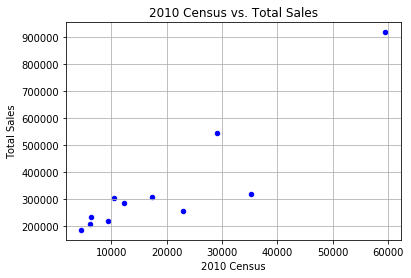

In [224]:
ax = end_df.plot(kind='scatter',x='2010 Census',y='Total Sales', color='blue'  )
plt.title('2010 Census vs. Total Sales');
 
plt.grid();
plt.show()

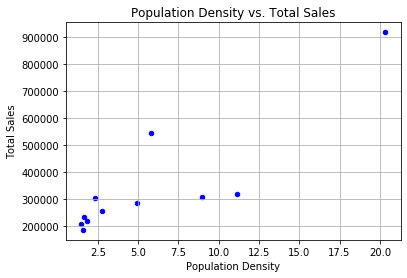

In [225]:
ax = end_df.plot(kind='scatter',x='Population Density',y='Total Sales', color='blue'  )
plt.title('Population Density vs. Total Sales');
 
plt.grid();
plt.show()

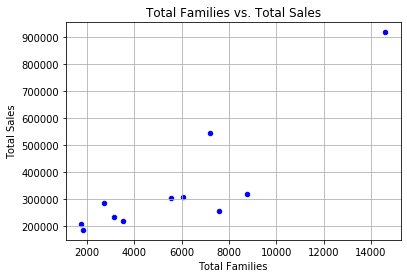

In [226]:
ax = end_df.plot(kind='scatter',x='Total Families',y='Total Sales', color='blue'  )
plt.title('Total Families vs. Total Sales');
 
plt.grid();
plt.show()

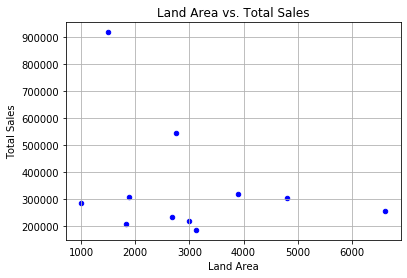

In [228]:
ax = end_df.plot(kind='scatter',x='Land Area',y='Total Sales', color='blue'  )
plt.title('Land Area vs. Total Sales');
 
plt.grid();
plt.show()